In [2]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support, f1_score, roc_curve, roc_auc_score, RocCurveDisplay, auc
from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

def convert(data):
    number = preprocessing.LabelEncoder()
    data['operator'] = number.fit_transform(data.operator)
    data['methodReturn'] = number.fit_transform(data.methodReturn)
    data['isKilled'] = number.fit_transform(data.isKilled)
    return data

# Read in data and display first 5 rows
features = pd.read_csv('py_files/training_data.csv',encoding= 'unicode_escape')
#print(features)
#print('The shape of our features is:', features.shape)

#Convert string to float
features=convert(features)
#print(features)
#print('The shape of our features is:', features.shape) 

# Use numpy to convert to arrays
# Labels are the values we want to predict
labels = np.array(features['isKilled'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('isKilled', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [3]:
#Without validation set. Replicating paper

# Instantiate model with 100 decision trees default
rf = RandomForestClassifier(random_state = 5,criterion="entropy")
rf.fit(features, labels)
y_pred_train = rf.predict(features)
print(accuracy_score(labels, y_pred_train))
print(confusion_matrix(labels, y_pred_train))

0.980890923315304
[[462772   7418]
 [  3891 117732]]


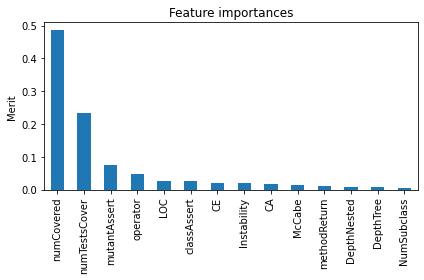

In [6]:
##Plot feature importance
feature_names = [f"features {i}" for i in range(features.shape[1])]
feature_names = ['DepthTree', 'NumSubclass', 'McCabe', 'LOC','DepthNested','CA','CE','Instability','numCovered','operator','methodReturn','numTestsCover','mutantAssert','classAssert']
importances = rf.feature_importances_

forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

#Feature importance
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Merit")
fig.tight_layout()

0.8627400802736848
Confusion_matrix:
 [[80987 11995]
 [ 8387 47123]]
(0.8627400802736848, 0.8627400802736848, 0.8627400802736848, None)
0.8627400802736848
[0.00000000e+00 1.80147721e-05 9.00738606e-05 ... 9.87713925e-01
 9.87713925e-01 1.00000000e+00] [0.         0.         0.         ... 0.32839689 0.32866576 1.        ] [2.00000000e+00 1.00000000e+00 9.96666667e-01 ... 2.50000000e-03
 1.25000000e-03 0.00000000e+00]
AUC:  0.9372576144496305
0.06274238555036957


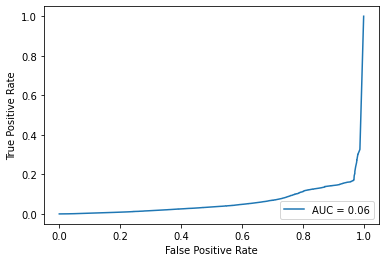

In [4]:
##Input test data
positive_prob = []
test = pd.read_csv('py_files/testing_data.csv',encoding= 'unicode_escape')

#Convert string to float
test=convert(test)

# ## Labels are the values we want to predict
test_labels = np.array(test['isKilled'])

# # Remove the labels from the features
# # axis 1 refers to the columns
test= test.drop('isKilled', axis = 1)
# # Saving feature names for later use
feature_list = list(test.columns)
# # Convert to numpy array
test = np.array(test)
y_pred_test = rf.predict(test)
#print("Predicted labels::", y_pred_test)
print(accuracy_score(test_labels, y_pred_test))
confusion = confusion_matrix(test_labels, y_pred_test)
print("Confusion_matrix:\n",confusion)
print(precision_recall_fscore_support(test_labels, y_pred_test, average='micro'))
print(f1_score(test_labels, y_pred_test, average='micro'))

# # #Get the probability of each predictions
predicted = rf.predict_proba(test)
#print(predicted)
# # #Take the positive predictictability i.e. survived for calculating ROC AUC
for i in predicted:
    positive_prob.append(i[1])
#print(positive_prob)
#Calculate ROC
fpr, tpr, thresholds = roc_curve(test_labels, positive_prob, pos_label=0)
print(fpr, tpr, thresholds)
try:
    print("AUC: ", roc_auc_score(test_labels, positive_prob))
    roc_auc = auc(fpr, tpr)
    print(roc_auc)
except:
    pass
display = RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)
display.plot()

In [15]:
##Validation set create training and testing vars with 0.5 test size
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.5,random_state=0)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
rf = RandomForestClassifier(random_state = 5,criterion="entropy")
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_test)
print(accuracy_score(y_test, y_pred_train))
print(confusion_matrix(y_test, y_pred_train))
y_pred_test = rf.predict(test)
#print("Predicted labels::", y_pred_test)
print(accuracy_score(test_labels, y_pred_test))
confusion = confusion_matrix(test_labels, y_pred_test)
print("Confusion_matrix:\n",confusion)
print(precision_recall_fscore_support(test_labels, y_pred_test, average='micro'))
print(f1_score(test_labels, y_pred_test, average='micro'))

(295906, 14) (295906,)
(295907, 14) (295907,)
0.9561956966208978
[[226786   8330]
 [  4632  56159]]
0.8720267758532446
Confusion_matrix:
 [[80668 12314]
 [ 6689 48821]]
(0.8720267758532446, 0.8720267758532446, 0.8720267758532446, None)
0.8720267758532446


In [16]:
##Validation set create training and testing vars with 0.3 test size
X1_train, X1_test, y1_train, y1_test = train_test_split(features, labels, test_size=0.3,random_state=0)
print (X1_train.shape, y1_train.shape)
print (X1_test.shape, y1_test.shape)
rf = RandomForestClassifier(random_state = 5,criterion="entropy")
rf.fit(X1_train, y1_train)
y1_pred_train = rf.predict(X1_test)
print(accuracy_score(y1_test, y1_pred_train))
print(confusion_matrix(y1_test, y1_pred_train))
y_pred_test = rf.predict(test)
#print("Predicted labels::", y_pred_test)
print(accuracy_score(test_labels, y_pred_test))
confusion = confusion_matrix(test_labels, y_pred_test)
print("Confusion_matrix:\n",confusion)
print(precision_recall_fscore_support(test_labels, y_pred_test, average='micro'))
print(f1_score(test_labels, y_pred_test, average='micro'))

(414269, 14) (414269,)
(177544, 14) (177544,)
0.9579766142477357
[[136389   4763]
 [  2698  33694]]
0.8598038951593352
Confusion_matrix:
 [[80396 12586]
 [ 8232 47278]]
(0.8598038951593352, 0.8598038951593352, 0.8598038951593352, None)
0.8598038951593352


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_train_logreg = logreg.predict(X_test)
print(accuracy_score(y_test, y_pred_train_logreg))
print(confusion_matrix(y_test, y_pred_train_logreg))
y_pred_test = logreg.predict(test)
#print("Predicted labels::", y_pred_test)
print(accuracy_score(test_labels, y_pred_test))
confusion = confusion_matrix(test_labels, y_pred_test)
print("Confusion_matrix:\n",confusion)
print(precision_recall_fscore_support(test_labels, y_pred_test, average='micro'))
print(f1_score(test_labels, y_pred_test, average='micro'))

0.9409882158921553
[[217779  17337]
 [   125  60666]]
0.8915766505939714
Confusion_matrix:
 [[76882 16100]
 [    0 55510]]
(0.8915766505939714, 0.8915766505939714, 0.8915766505939714, None)
0.8915766505939714


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X1_train, y1_train)
y1_pred_train_logreg = logreg.predict(X1_test)
print(accuracy_score(y1_test, y1_pred_train_logreg))
print(confusion_matrix(y1_test, y1_pred_train_logreg))
y_pred_test = logreg.predict(test)
#print("Predicted labels::", y_pred_test)
print(accuracy_score(test_labels, y_pred_test))
confusion = confusion_matrix(test_labels, y_pred_test)
print("Confusion_matrix:\n",confusion)
print(precision_recall_fscore_support(test_labels, y_pred_test, average='micro'))
print(f1_score(test_labels, y_pred_test, average='micro'))

0.9414060739872933
[[130824  10328]
 [    75  36317]]
0.891590119333028
Confusion_matrix:
 [[76884 16098]
 [    0 55510]]
(0.891590119333028, 0.891590119333028, 0.891590119333028, None)
0.891590119333028


In [ ]:
# Running for different n_estimators to get a range for randomized search grid
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 20)]
for i in n_estimators:
    rf = RandomForestClassifier(n_estimators = i, random_state = 5,criterion="entropy")
    rf.fit(features, labels)
    y_pred_train = rf.predict(features)
    print(accuracy_score(labels, y_pred_train))
    print(confusion_matrix(labels, y_pred_train))

In [ ]:
#Hyper parameter tuning
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Import the model we are using
rf = RandomForestClassifier()
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=5, n_jobs = -1)
rf_random.fit(features, labels)
print(rf_random.best_params_)